## Libraries

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import LabelEncoder

## Load data

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data.head(10)

,id,gender,dob,zipcode,employment_status,education,marital_status,children,ancestry,avg_commute,daily_internet_use,available_vehicles,military_service,disease
0,Amelia Nixon,female,1944-03-09,89136,retired,bachelors,married,1,Portugal,13.38,2.53,2,no,hypertension
1,Clara Hicks,female,1966-07-02,94105,employed,phd/md,married,4,Sweden,15.16,6.77,2,no,endometriosis
2,Mason Brown,male,1981-05-31,89127,employed,masters,married,2,Germany,23.60,3.63,1,no,prostate cancer
3,Michael Rice,male,1945-02-13,44101,retired,bachelors,married,2,Denmark,19.61,5.00,3,no,multiple sclerosis
4,Eleanor Ritter,female,1939-09-03,89136,retired,masters,married,3,Austria,36.55,7.75,1,no,skin cancer
5,Sofia Wise,female,1956-10-16,94105,unemployed,highschool,married,2,Austria,48.68,3.34,0,no,Alzheimer's disease
6,Nevaeh Perry,female,1946-09-30,60612,retired,phd/md,married,0,Hungary,30.92,6.75,2,no,kidney disease
7,Addison Combs,female,1963-01-17,43221,employed,bachelors,married,2,Ireland,20.47,3.01,3,no,breast cancer
8,Ashley Wilson,female,1946-10-21,89127,retired,masters,single,2,Austria,39.13,4.12,1,no,Alzheimer's disease
9,Levi Burns,male,1958-01-31,43210,employed,highschool,married,7,Ukraine,37.69,3.15,1,no,HIV/AIDS


In [4]:
data.drop(["id","zipcode"],axis=1,inplace=True)
# these columns are unnecessary

In [5]:
data.isnull().any()

gender                False
dob                   False
employment_status     False
education             False
marital_status        False
children              False
ancestry              False
avg_commute           False
daily_internet_use    False
available_vehicles    False
military_service      False
disease               False
dtype: bool

We don't have any NA values in dataset

In [6]:
data.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              2000 non-null   object 
 1   dob                 2000 non-null   object 
 2   employment_status   2000 non-null   object 
 3   education           2000 non-null   object 
 4   marital_status      2000 non-null   object 
 5   children            2000 non-null   int64  
 6   ancestry            2000 non-null   object 
 7   avg_commute         2000 non-null   float64
 8   daily_internet_use  2000 non-null   float64
 9   available_vehicles  2000 non-null   int64  
 10  military_service    2000 non-null   object 
 11  disease             2000 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 187.6+ KB


## Data analysis

In [7]:
data['disease'].value_counts() 

Alzheimer's disease    339
hypertension           298
skin cancer            233
kidney disease         185
prostate cancer        180
breast cancer          145
diabetes               119
multiple sclerosis     113
gastritis              100
heart disease           87
HIV/AIDS                80
endometriosis           66
schizophrenia           55
Name: disease, dtype: int64

#### Disease occurence

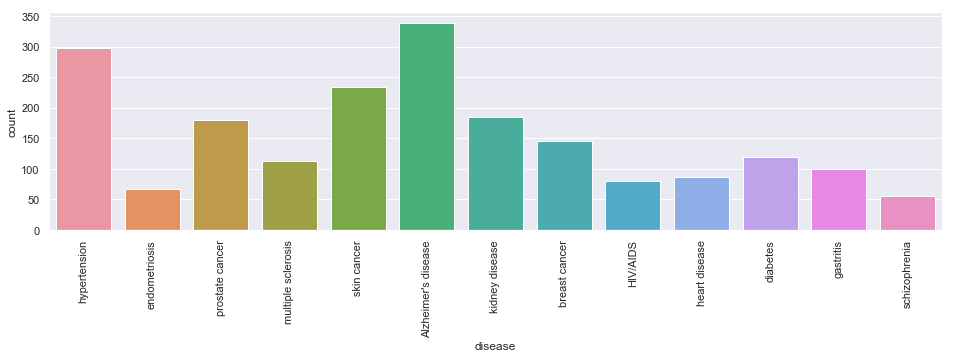

In [11]:
# Countplot of disease occurence 

plt.figure(figsize=(16,4))
sns.countplot(data["disease"])
plt.xticks(rotation="90")
plt.show()

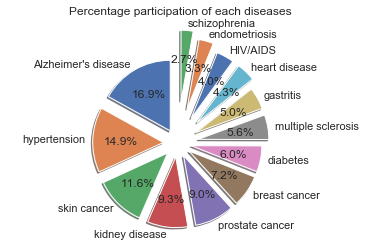

In [12]:

labels =["Alzheimer's disease","hypertension","skin cancer","kidney disease","prostate cancer","breast cancer","diabetes",
        "multiple sclerosis","gastritis","heart disease","HIV/AIDS","endometriosis","schizophrenia"]

explode = (0.2, 0.2, 0.2,0.2, 0.2, 0.2,0.2, 0.3, 0.3,0.4, 0.4, 0.5,0.6) 

fig1, ax1 = plt.subplots()
ax1.pie(data['disease'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage participation of each diseases")

plt.show()

#### Married vs single

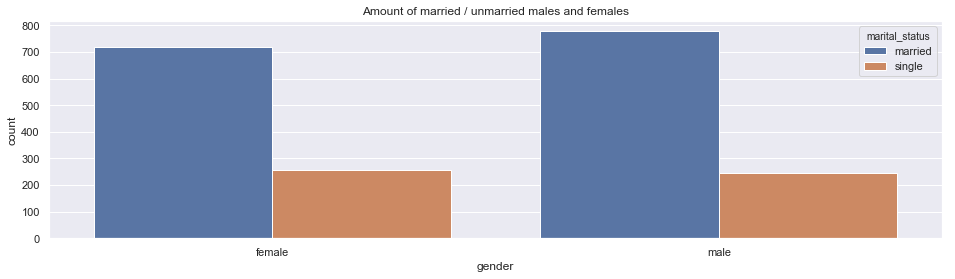

In [10]:
plt.figure(figsize=(16,4))
sns.countplot(data["gender"],hue=data["marital_status"])
plt.title("Amount of married / unmarried males and females")
plt.show()

Observation: Most of people are married

#### Employment status and disease type

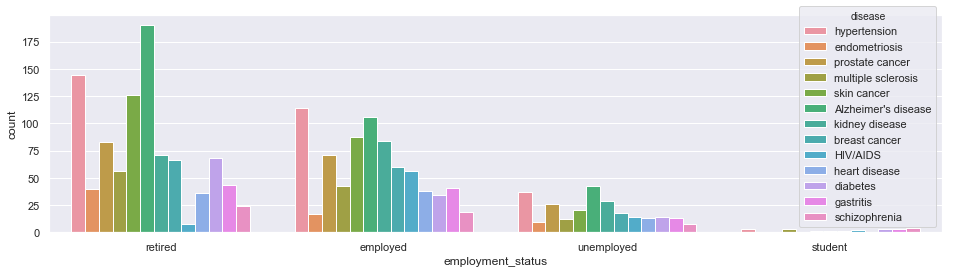

In [14]:
plt.figure(figsize=(16,4))
sns.countplot(data["employment_status"],hue=data["disease"])
plt.show()

Observation: Most of retired people have Alzheimer disease and hypertension, but they almost don't have HIV/AIDS in contrast to other groups. 

#### Education

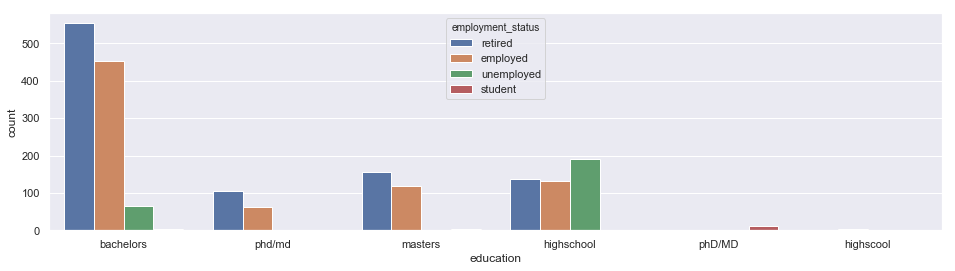

In [15]:
plt.figure(figsize=(16,4))
sns.countplot(data["education"],hue=data["employment_status"])
plt.show()

We can observe most of people have a higher education

#### Countries 

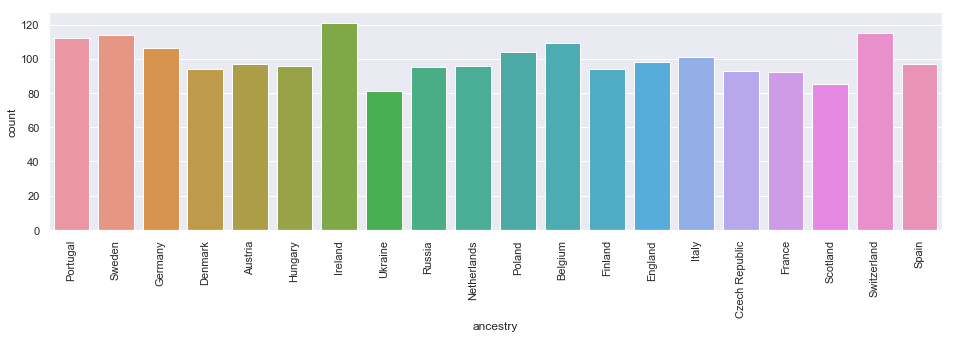

In [16]:
plt.figure(figsize=(16,4))
sns.countplot(data["ancestry"])
plt.xticks(rotation="90")
plt.show()

#### Children

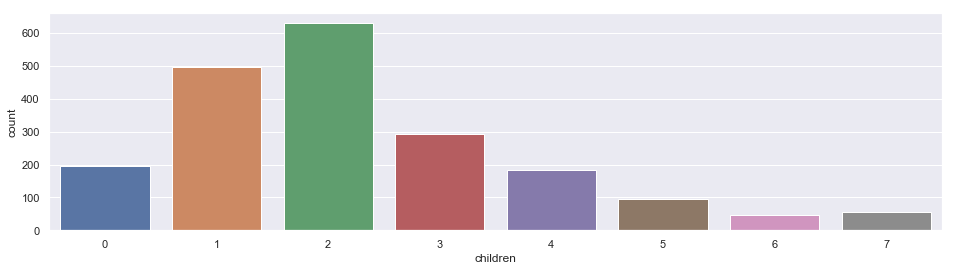

In [17]:
plt.figure(figsize=(16,4))
sns.countplot(data["children"])
plt.show()

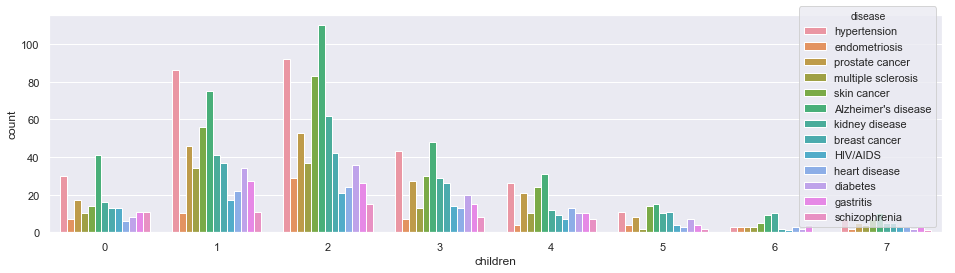

In [18]:
plt.figure(figsize=(16,4))
sns.countplot(data["children"],hue=data["disease"])
plt.show()

Observation: Number of children don't have relationship with type of disease

#### Number of vehicles

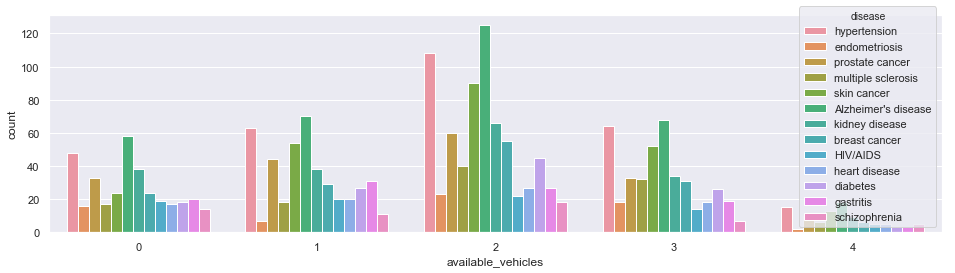

In [19]:
plt.figure(figsize=(16,4))
sns.countplot(data["available_vehicles"],hue=data["disease"])
plt.show()

#### Internet using

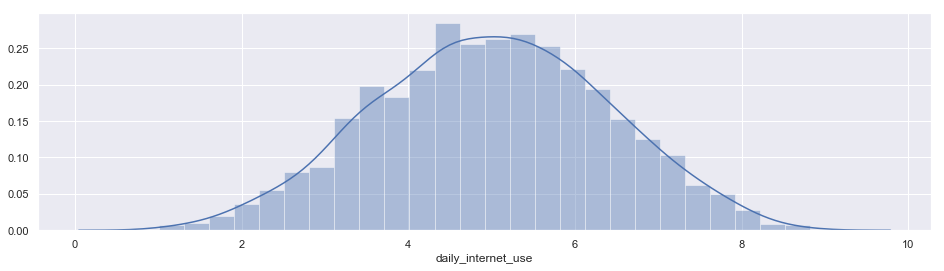

In [20]:
plt.figure(figsize=(16,4))
sns.distplot(data["daily_internet_use"])
plt.show()

Observation: Distribution of a daily internet use have normal distribution, we can see a mean is around 5 hours. 

Of course we can check internet using for each employment group.

In [21]:
df1=data[data["employment_status"].astype(str)=="retired"]
df2=data[data["employment_status"].astype(str)=="employed"]
df3=data[data["employment_status"].astype(str)=="unemployed"]
df4=data[data["employment_status"].astype(str)=="student"]

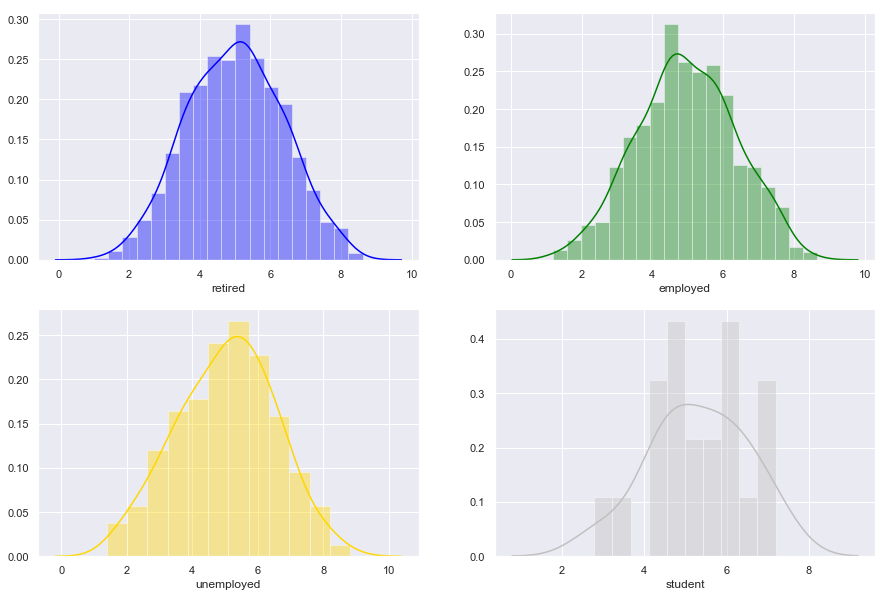

<Figure size 432x288 with 0 Axes>

In [22]:
f, axes = plt.subplots(2, 2,figsize=(15,10), sharex=False)

sns.distplot(df1["daily_internet_use"] , color="blue", ax=axes[0, 0], axlabel="retired")
sns.distplot(df2["daily_internet_use"] , color="green", ax=axes[0, 1],axlabel="employed")
sns.distplot(df3["daily_internet_use"] , color="gold", ax=axes[1, 0],axlabel="unemployed")
sns.distplot(df4["daily_internet_use"] , bins=10,color="silver", ax=axes[1, 1],axlabel="student")

plt.show()
plt.tight_layout()

In [23]:
# average daily internet using
print("Retired:",df1["daily_internet_use"].mean())
print("Employed:",df2["daily_internet_use"].mean())
print("Unemployed:",df3["daily_internet_use"].mean())
print("Student:",df4["daily_internet_use"].mean())
     

Retired: 4.998586387434551
Employed: 4.965279583875156
Unemployed: 5.032549019607845
Student: 5.3047619047619055


Observation: Each of these countries have similar amount of respondents.

Now we focus on age of these people. 

To do that we should get this information from date of birth.

In [24]:
Years = [ ]
for str in list(data['dob']):
    year = 2020-int(str.split('-')[0])
    Years.append(year)
data['age'] = Years

In [25]:
data.head(10)

,gender,dob,employment_status,education,marital_status,children,ancestry,avg_commute,daily_internet_use,available_vehicles,military_service,disease,age
0,female,1944-03-09,retired,bachelors,married,1,Portugal,13.38,2.53,2,no,hypertension,76
1,female,1966-07-02,employed,phd/md,married,4,Sweden,15.16,6.77,2,no,endometriosis,54
2,male,1981-05-31,employed,masters,married,2,Germany,23.60,3.63,1,no,prostate cancer,39
3,male,1945-02-13,retired,bachelors,married,2,Denmark,19.61,5.00,3,no,multiple sclerosis,75
4,female,1939-09-03,retired,masters,married,3,Austria,36.55,7.75,1,no,skin cancer,81
5,female,1956-10-16,unemployed,highschool,married,2,Austria,48.68,3.34,0,no,Alzheimer's disease,64
6,female,1946-09-30,retired,phd/md,married,0,Hungary,30.92,6.75,2,no,kidney disease,74
7,female,1963-01-17,employed,bachelors,married,2,Ireland,20.47,3.01,3,no,breast cancer,57
8,female,1946-10-21,retired,masters,single,2,Austria,39.13,4.12,1,no,Alzheimer's disease,74
9,male,1958-01-31,employed,highschool,married,7,Ukraine,37.69,3.15,1,no,HIV/AIDS,62


In [26]:
data["age"].mean()

66.4165

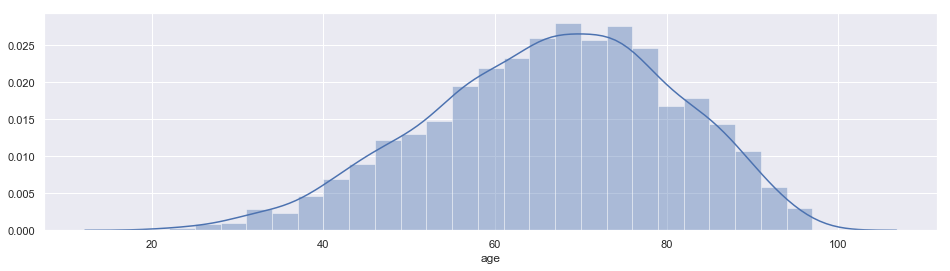

In [27]:
plt.figure(figsize=(16,4))
sns.distplot(data["age"],bins=25)
plt.show()

Observation: Most of respondents are quite old, average age of them is 66 years.

#### Disease type with every numerical feature

<Figure size 1152x288 with 0 Axes>

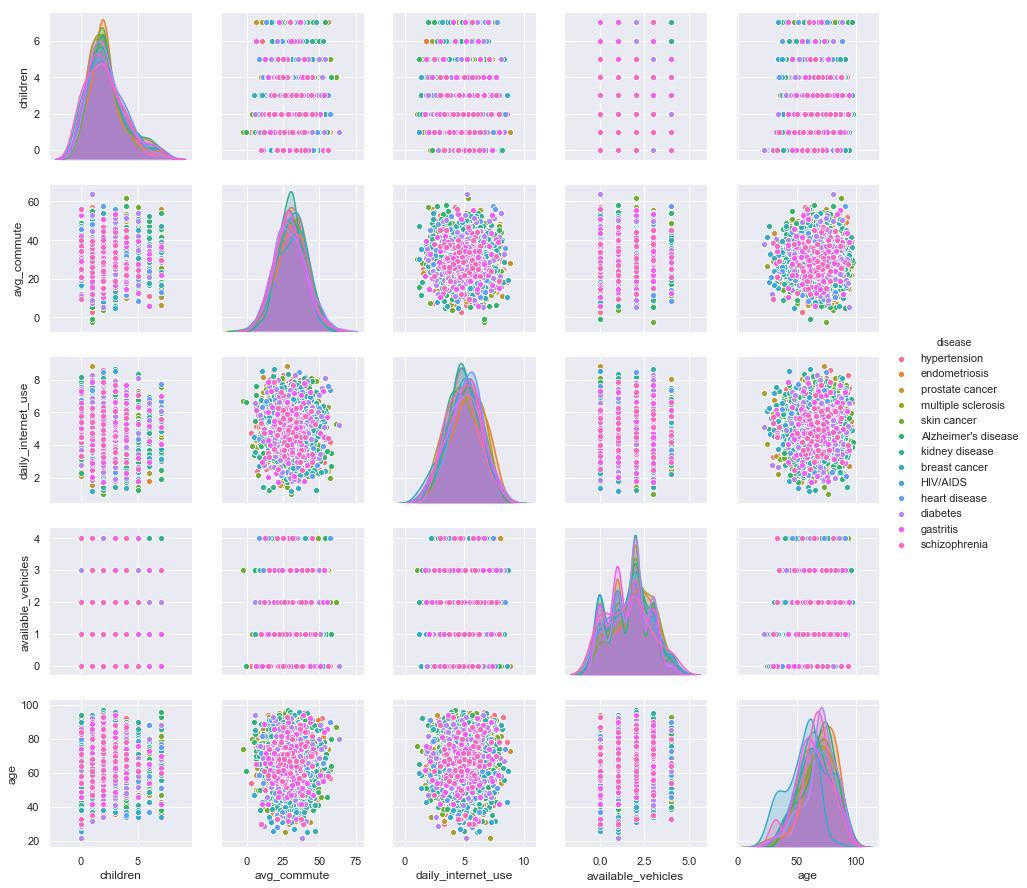

In [28]:
plt.figure(figsize=(16,4))
sns.pairplot(data,hue="disease")
plt.show()

#### Gender with every numerical feature

<Figure size 1152x288 with 0 Axes>

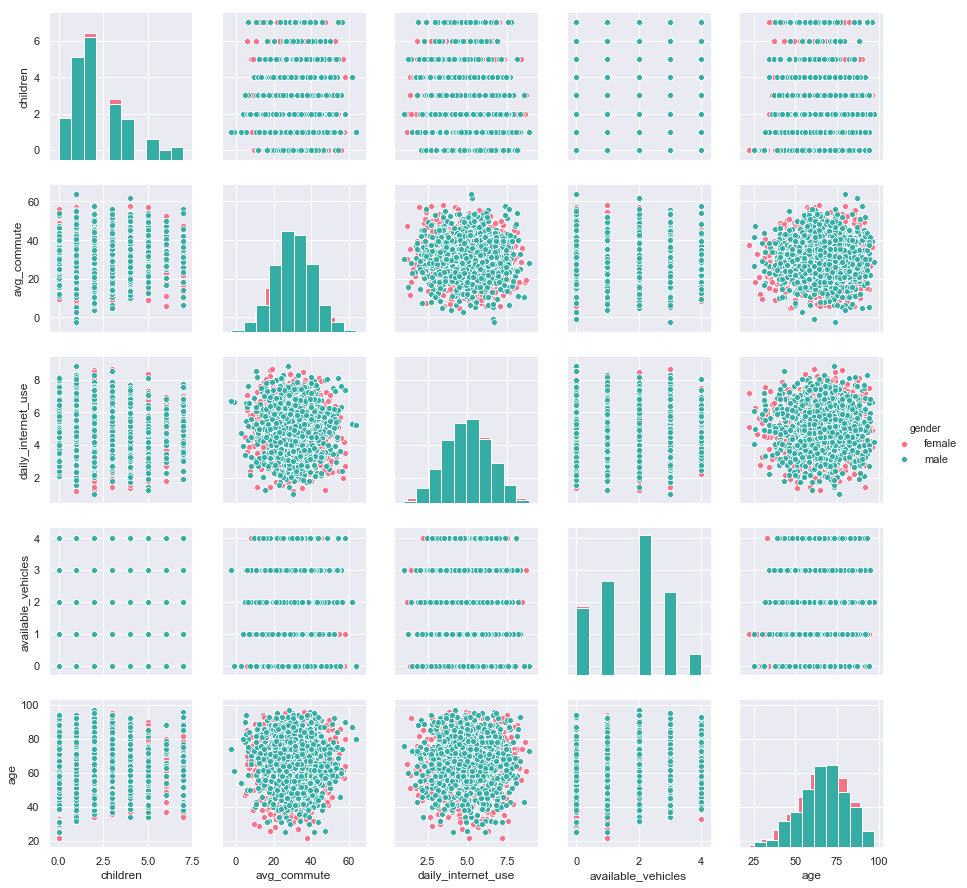

In [29]:
plt.figure(figsize=(16,4))
sns.pairplot(data,hue="gender",palette="husl",diag_kind="hist")
plt.show()

#### Education with every numerical feature

<Figure size 1152x288 with 0 Axes>

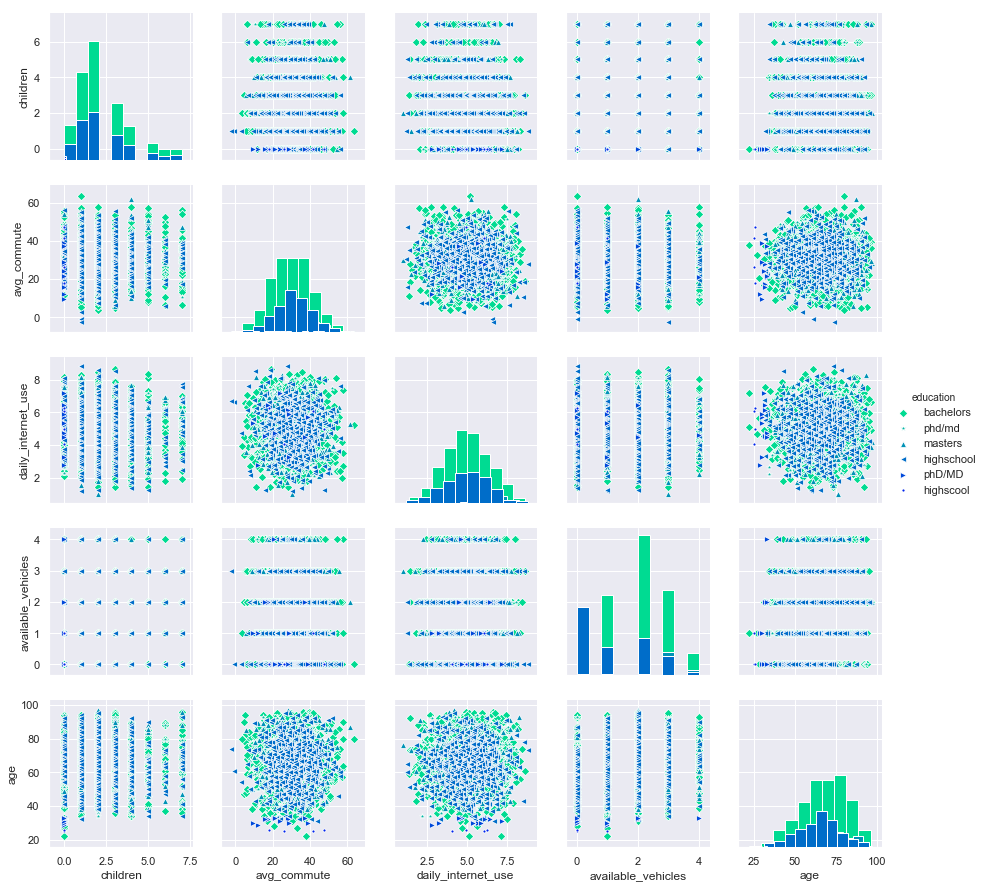

In [30]:
plt.figure(figsize=(16,4))
sns.pairplot(data,hue="education",palette="winter_r",diag_kind="hist",markers=["D","*","^","<",">","."])
plt.show()

#### Relation between amount of childen and internet time using

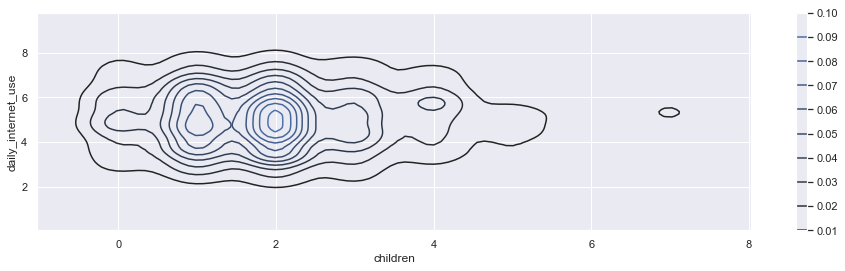

In [31]:
plt.figure(figsize=(16,4))
sns.kdeplot(data["children"],data["daily_internet_use"],cbar=True)
# Fit and plot a univariate or bivariate kernel density estimate.
plt.show()

#### Correlation Matrix

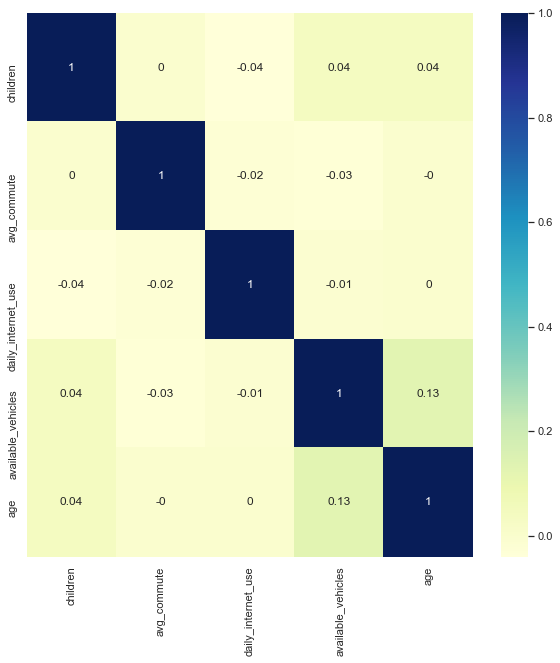

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(round(data.corr(),2),annot=True,cmap="YlGnBu")
# Round function returns aproximation with 2 digits after comma
plt.show()

We can observe no relationship between features 

#### Encode to numerical data

In [40]:
lb=LabelEncoder()

In [52]:
# LabelEncoder save labels with value between 0 and number_classes-1.
data["employment_status"] = lb.fit_transform(data["employment_status"])
data["gender"] = lb.fit_transform(data["gender"])
data["marital_status"] = lb.fit_transform(data["marital_status"])
data["ancestry"] = lb.fit_transform(data["ancestry"])
data["education"] = lb.fit_transform(data["education"])
data["military_service"] = lb.fit_transform(data["military_service"])

data["disease"] = lb.fit_transform(data["disease"])

In [53]:
data.head()

,gender,dob,employment_status,education,marital_status,children,ancestry,avg_commute,daily_internet_use,available_vehicles,military_service,disease,age
0,0,1944-03-09,1,0,0,1,13,13.38,2.53,2,0,7,76
1,0,1966-07-02,0,5,0,4,17,15.16,6.77,2,0,4,54
2,1,1981-05-31,0,3,0,2,7,23.60,3.63,1,0,10,39
3,1,1945-02-13,1,0,0,2,3,19.61,5.00,3,0,9,75
4,0,1939-09-03,1,3,0,3,0,36.55,7.75,1,0,12,81


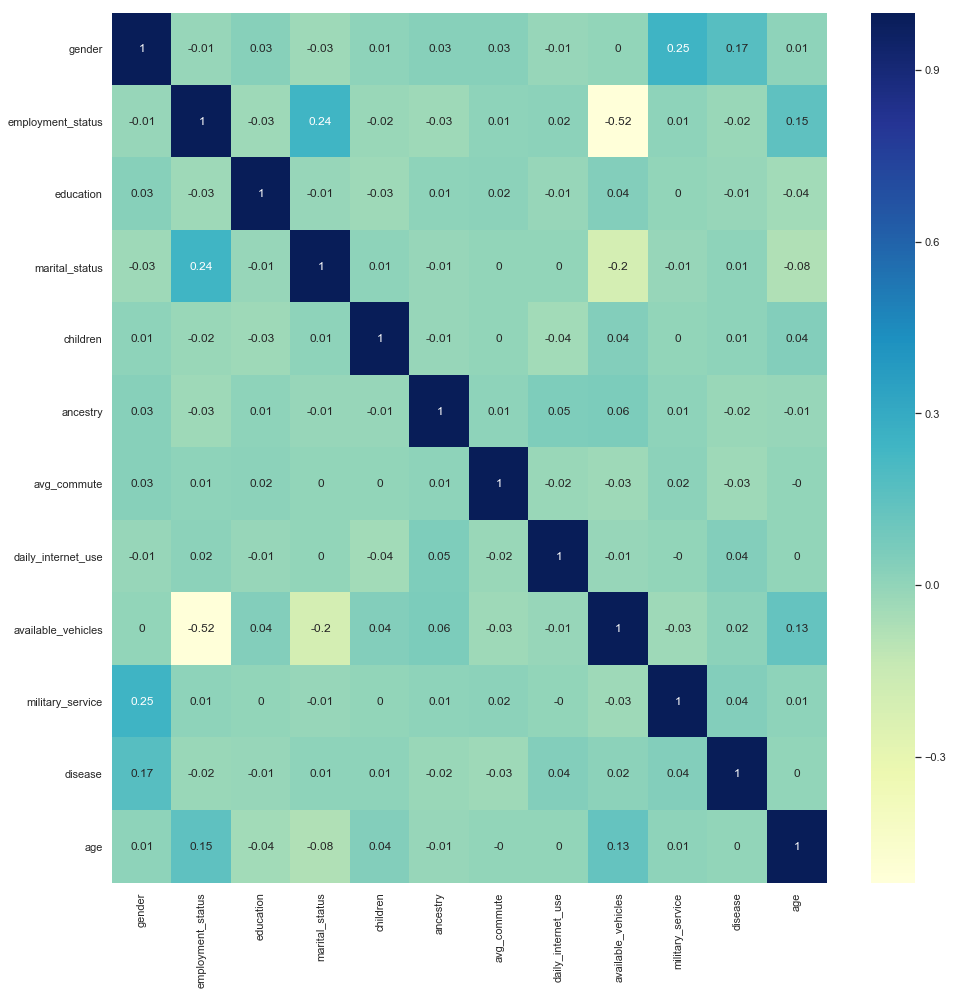

In [54]:
plt.figure(figsize=(16,16))
sns.heatmap(round(data.corr(),2),annot=True,cmap="YlGnBu")
# Round function returns aproximation with 2 digits after comma
plt.show()

Observation: Between military service and gender occurs a weak correlation, what is understandable.